Reading file /media/lan/281359a3-2852-42b9-8f10-ef4571915718/epoch-4.19.1/epoch2d/cpf/field0007.sdf
t() = time
bx(1200, 600) = bx
ex(1200, 600) = ex
ey(1200, 600) = ey
x(1201, 601) = grid
y(1201, 601) = grid
xc(1200, 600) = grid_mid
yc(1200, 600) = grid_mid
CPUs_Current_rank <class 'sdf.BlockPlainVariable'> [0, 0]
CPUs_Original_rank <class 'sdf.BlockPlainVariable'> [ 2, 40]
Electric_Field_Ex <class 'sdf.BlockPlainVariable'> [1200,  600]
Electric_Field_Ey <class 'sdf.BlockPlainVariable'> [1200,  600]
Grid_CPUs_Original_rank <class 'sdf.BlockPlainMesh'> [ 3, 41]
Grid_CPUs_Original_rank_mid <class 'sdf.BlockPlainMesh'> [ 2, 40]
Grid_Grid <class 'sdf.BlockPlainMesh'> [1201,  601]
Grid_Grid_mid <class 'sdf.BlockPlainMesh'> [1200,  600]
Magnetic_Field_Bx <class 'sdf.BlockPlainVariable'> [1200,  600]
Wall_time <class 'sdf.BlockConstant'> [1]


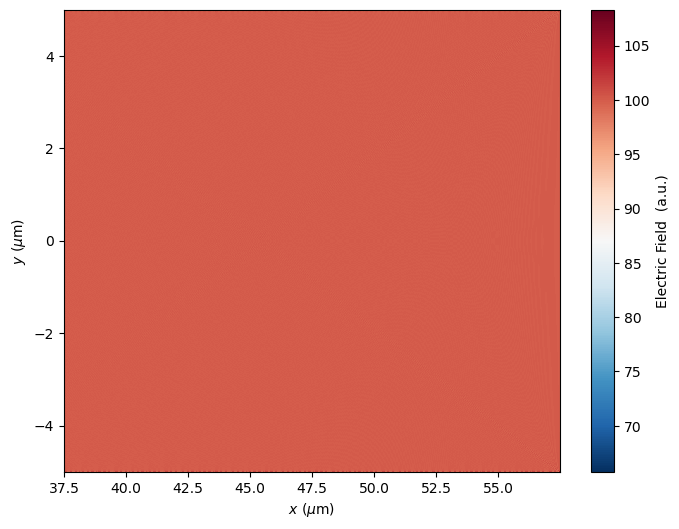

In [5]:
# 查看数据类型
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import os

# 设定数据路径
base_path = '/media/lan/281359a3-2852-42b9-8f10-ef4571915718/epoch-4.19.1/epoch2d/cpf'
file_prefix = 'field'
file_suffix = '.sdf'
file_index = 7
file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
file_path = os.path.join(base_path, file_name)

# 读取数据
Field_Data = sh.getdata(file_path)
sh.list_variables(Field_Data)

# 获取坐标轴并转为微米
grid = Field_Data.Grid_Grid_mid.data
x = grid[0] / 1e-6
y = grid[1] / 1e-6

bx = Field_Data.Magnetic_Field_Bx.data
X, Y = np.meshgrid(x, y, indexing='ij')


fig, ax = plt.subplots(figsize=(8, 6))
c = ax.pcolormesh(X, Y, bx, shading='auto', cmap='RdBu_r')
cbar = plt.colorbar(c, ax=ax)
cbar.set_label('Electric Field  (a.u.)')
ax.set_xlabel(r'$x\ (\mu\mathrm{m})$')
ax.set_ylabel(r'$y\ (\mu\mathrm{m})$')

# plt.tight_layout()
plt.show()


# def plot_2d_field(field_data, x_vals, y_vals, field_label='Ey', time_fs=None):
#     """绘制 2D 电场分布图，带时间标注"""
#     X, Y = np.meshgrid(x_vals, y_vals, indexing='ij')

#     fig, ax = plt.subplots(figsize=(8, 6))
#     c = ax.pcolormesh(X, Y, field_data, shading='auto', cmap='RdBu_r')

#     cbar = plt.colorbar(c, ax=ax)
#     cbar.set_label(f'Electric Field ${field_label}$ (a.u.)')

#     ax.set_xlabel(r'$x\ (\mu\mathrm{m})$')
#     ax.set_ylabel(r'$y\ (\mu\mathrm{m})$')
    
#     if time_fs is not None:
#         ax.set_title(f'Electric Field ${field_label}$ at $t = {time_fs:.1f}\ \mathrm{{fs}}$', fontsize=14)
#     else:
#         ax.set_title(f'Electric Field ${field_label}$', fontsize=14)

#     plt.tight_layout()
#     plt.show()

In [3]:
# 读取电场文件
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

# -------- 统一设置 matplotlib 风格 --------
def set_global_plot_style():
    """统一设置 matplotlib 绘图风格"""
    import matplotlib as mpl
    mpl.rcParams.update({
        'font.family': 'Times New Roman',
        'font.size': 14,
        'axes.labelsize': 14,
        'axes.titlesize': 16,
        'axes.linewidth': 1.2,
        'lines.linewidth': 1.5,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'xtick.direction': 'out',
        'ytick.direction': 'out',
        'xtick.minor.size': 4,
        'ytick.minor.size': 4,
        'xtick.minor.width': 1,
        'ytick.minor.width': 1,
        'legend.fontsize': 12,
        'figure.titlesize': 16,
        'figure.dpi': 100,
        'savefig.dpi': 300,
        'savefig.bbox': 'tight',
        'mathtext.fontset': 'cm',
        'mathtext.rm': 'serif'
    })

# 应用统一风格
set_global_plot_style()

# -------- 设置文件路径 --------
# base_path = '/media/lan/4248e56e-6d9a-4026-afad-e8b1d59ceab0/epoch-set2/epoch3d/电子片左旋'
base_path = '/media/lan/281359a3-2852-42b9-8f10-ef4571915718/epoch-4.19.1/epoch2d/cpf'
file_prefix = 'field'
file_suffix = '.sdf'
file_index = 2
file_name = f"{file_prefix}{file_index:04d}{file_suffix}"
file_path = os.path.join(base_path, file_name)

# -------- 读取数据 --------
Field_Data = sh.getdata(file_path)

# 获取对应电场数据
field_dict = {
    'Ex': Field_Data.Electric_Field_Ex.data,
    'Ey': Field_Data.Electric_Field_Ey.data,
    "Bx":Field_Data.Magnetic_Field_Bx.data,
}

# 获取坐标轴并转为微米
grid = Field_Data.Grid_Grid_mid.data
x = grid[0] / 1e-6
y = grid[1] / 1e-6

In [5]:
def plot_2d_field(field_data, x_vals, y_vals, field_label='Ey', time_fs=None):
    """绘制 2D 电场分布图，带时间标注"""
    X, Y = np.meshgrid(x_vals, y_vals, indexing='ij')

    fig, ax = plt.subplots(figsize=(8, 6))
    c = ax.pcolormesh(X, Y, field_data, shading='auto', cmap='RdBu_r')

    cbar = plt.colorbar(c, ax=ax)
    cbar.set_label(f'Electric Field ${field_label}$ (a.u.)')

    ax.set_xlabel(r'$x\ (\mu\mathrm{m})$')
    ax.set_ylabel(r'$y\ (\mu\mathrm{m})$')
    
    if time_fs is not None:
        ax.set_title(f'Electric Field ${field_label}$ at $t = {time_fs:.1f}\ \mathrm{{fs}}$', fontsize=14)
    else:
        ax.set_title(f'Electric Field ${field_label}$', fontsize=14)

    plt.tight_layout()
    plt.show()

<>:15: SyntaxWarning: invalid escape sequence '\ '
<>:15: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_1154710/3664299149.py:15: SyntaxWarning: invalid escape sequence '\ '
  ax.set_title(f'Electric Field ${field_label}$ at $t = {time_fs:.1f}\ \mathrm{{fs}}$', fontsize=14)
